# ETHIC - Primavera 2024

##  Selección de caso

* 1) Caso Amanda

In [1]:
from utils.extract_data import process_data
from utils.extract_data import read_data

caso = process_data()
df1, df2 = read_data(caso)

Casos disponibles:
1. Amanda
Caso seleccionado: Amanda
Archivo: Procesamient_2023_CD1201_2.xlsx, Año: 2023, Sección: 2
Archivo: Procesamient_2023_CD1201_3.xlsx, Año: 2023, Sección: 3
Archivo: Procesamient_2023_CD1201_4.xlsx, Año: 2023, Sección: 4
Archivo: Procesamient_2023_CD1201_5.xlsx, Año: 2023, Sección: 5
Archivo: Procesamient_2023_CD1201_7.xlsx, Año: 2023, Sección: 7
Archivo: Procesamient_2023_CD1201_8.xlsx, Año: 2023, Sección: 8
Archivo: Procesamient_2023_CD1201_9.xlsx, Año: 2023, Sección: 9
Archivo: Procesamient_2024_CD1100_2.xlsx, Año: 2024, Sección: 2
Archivo: Procesamient_2024_CD1100_4.xlsx, Año: 2024, Sección: 4
Archivo: Procesamient_2024_CD1100_6.xlsx, Año: 2024, Sección: 6
Archivo: Procesamient_2024_CD1100_7.xlsx, Año: 2024, Sección: 7
Archivo: Procesamient_2024_CD1100_8.xlsx, Año: 2024, Sección: 8

Carpeta ya existe: processed_data/Amanda
Datos procesados guardados en: processed_data/Amanda/answers_by_secc_Amanda.csv

Datos leídos de: processed_data/Amanda/answers_by_secc

In [2]:
df1 = df1.head()
df2 = df2.head()

## Análisis Gramatical

Se debe ejecutar la celda de ejecutar análisis solo si se desea realizar uno nuevo. De lo contrario basta con ejecutar la celda de graficar.

In [ ]:
from utils.dependency_tree import ejecutar_analisis
ejecutar_analisis(df1, df2, caso)

In [ ]:
%%capture
from utils.dependency_tree import tree_dependency_graphs
tree_dependency_graphs(caso)

## Analisis de Topicos BERT

### Entrenamiento Modelo Bert Topic

Solo es necesario ejecutarlo si se desea entrenar nuevamente al modelo con más datos.

In [ ]:
from utils.bertopic_model import *

# Crear tokenizer
tokenizer = StemmerTokenizer(stem=False, lemmatize=True)

# Cargar y preprocesar comentarios
comentarios_tokenizados = cargar_y_preprocesar_comentarios(df1, df2, tokenizer)

# Entrenar modelo BERTopic
entrenar_modelo_bertopic(comentarios_tokenizados)

### Tópicos BERT

Obtener los tópicos encontrados por el modelo BERT. Esta celda se debe ejecutar solo si se desea realizar un nuevo análisis. <br>
https://huggingface.co/dccuchile/patana-chilean-spanish-bert

In [ ]:
from utils.bertopic_model import *
# Cargar el modelo BERTopic desde el archivo guardado
BERT_model = BERTopic.load("models/BertTopic_model")

In [ ]:
# Prediccion de topicos (ejecutar si se desea realizar uha nueva)
predict_topics(BERT_model, df1, df2, caso)

In [ ]:
topic_counts_resultados = contar_topicos(caso)
graficar_topicos_agrupados(topic_counts_resultados, 1, BERT_model, caso) 
graficar_topicos_agrupados(topic_counts_resultados, 2, BERT_model, caso)

## Análisis de Tópics Éticos

La celda para obtener los tópicos éticos solo debe ejecutarse si se desea realizar una nueva predicción.

In [ ]:
from utils.ethic_topics_model import predict_ethic_topic
predict_ethic_topic(df1, df2, caso)

Se obtienen gráficos de los tópicos éticos encontrados, y aquellos que son más y menos comunes. 

In [ ]:
%%capture
from utils.ethic_topics_model import procesar_y_graficar_topicos
procesar_y_graficar_topicos(caso, 1)
procesar_y_graficar_topicos(caso, 2)

## Tópicos distintos entre etapas

Análisis de cuantos topicos distintos se encuentran en las respuestas, diferenciando por etapas y por tópicos BERT y ETHIC.

In [ ]:
from utils.ethic_words import distinct_topics
distinct_topics(caso)

## Comparación de tópicos éticos entre etapas

In [ ]:
from utils.ethic_topics_model import ethic_topics_between_stages
ethic_topics_between_stages(caso)

In [ ]:
from utils.ethic_topics_model import ethic_topics_dependency_betweeen_stages
ethic_topics_dependency_betweeen_stages(caso)

## Nubes de palabras

In [ ]:
%%capture
from utils.bertopic_model import *
from utils.wordclouds import *

stop_words_custom
tokenizer = StemmerTokenizer(stem=True, lemmatize=True)
crear_nubes_palabras(caso, df1, df2, tokenizer=tokenizer, stop_words_custom=stop_words_custom)

## Frecuencia de aparación de palabras éticas

In [ ]:
from utils.bertopic_model import *
from utils.ethic_words import *

stop_words_custom
tokenizer = StemmerTokenizer(stem=True, lemmatize=True)
contar_palabras_etica(df1, df2, tokenizer=tokenizer)

## Conectores más usados

https://huggingface.co/PlanTL-GOB-ES/roberta-large-bne-capitel-pos

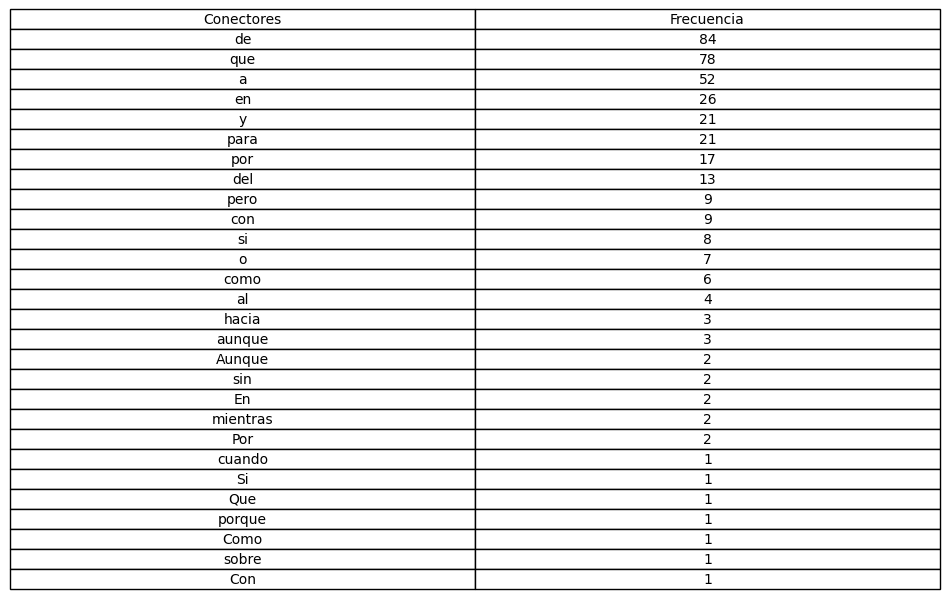

In [ ]:
%%capture
from utils.grammar_connectors import extract_grammar_connectors

extract_grammar_connectors(df1, df2, caso)

## Justificaciones post conectores

In [3]:
from utils.grammar_connectors import extract_keywords_after_connectors
extract_keywords_after_connectors(df1, df2, caso)

Palabras clave después de conectores guardadas en resultados/Amanda/Palabras_Clave_Despues_Conectores.csv


,Palabra Clave,Importancia
0,personas,24.465240
1,población,15.683385
2,tuberculosis,10.277453
3,migrantes,8.664315
4,vidas,8.559081
5,proyecto,8.397754
6,país,7.335871
7,importante,7.000000
8,permite,7.000000
9,proporciona,7.000000
